# 반도체 공정 이상 탐지

1. 문제상황 및 데이터 살펴보기
2. 문제해결 프로세스 정의
3. Data 전처리 및 EDA (데이터 조기 특성 탐색 진행)
4. Feature Selection (의미 있는 변수 선택)
5. 이상 탐지 모델링

In [1]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# 문제상황 및 데이터 살펴보기

| 시나리오

A사는 반도체를 생산하는 글로벌 회사이다. 반도체 구성품 중 Wafer는 반도체 집적회로의 핵심 재료이다. A사는 반도체의 성능을 향샹시키기 위해서 최근 Wafer 설계를 변경하고 제품을 생산 중에 있다. 설계 변경으로 인해 최근 불량 제품이 발생하고 있어, 이상 탐지 모델링을 통해 이상인 Wafer를 사전에 검출하고자 한다.

> 데이터 살펴보기

- Wafer 공정 Data
- 데이터 명세

|Column|Description|
|:---|:---|
|feature1~n|Wafer 특성 데이터|
|Class|이상 여부|


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df_train = pd.read_csv("chapter03_df_train.csv")
df_test = pd.read_csv("chapter03_df_test.csv")

df = pd.concat([df_train, df_test], axis=0)
df.head()

# 정상이면 Class == 0.0
# 이상이면 Class == 1.0

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100.0,160.0,1.6000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,20.0,83.0,4.1500,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
2,99.0,150.0,1.5151,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,40.0,40.0,1.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,12.0,234.0,19.5000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


# 문제해결 프로세스 정의

> 문제정의
- 최근 설계변경으로 인한 Wafer 불량 발생

> 기대효과
- Wafer 불량 사전 탐지를 통해 반도체 완성 전 사전 처리
- 불량 및 폐기 비용 감소

> 해결 방안
- 이상 탐지 모델링을 통해 반도체 완성품 조립 전 Wafer 불량 발견
- Data 전처리 및 EDA
- Feature Selection
- 이상 탐지 모델링

> 성과측정 (KPI)
- 모델 활용 전/후 Wafer 불량률 비교

> 현업적용
- Wafer 공정 데이터 수집 체계 구축
- 공정 데이터 Model Input
- 이상 Wafer 추출 및 점검

### 주요 코드
1. 데이터 전처리 및 EDA

.isna(), .dropna(), .isnull().sum().sum(), .loc, value_counts()

2. Feature Selection

StandardScaler().fit_transform(X), np.digitize(df_[col], bins)

3. 모델링

.iloc, pca.explained_variance_ratio_, np.cumsum, .dist_


# Data 전처리 및 EDA

In [3]:
# 데이터 전처리
# Data shape 확인
# Data Type 확인
# Null 확인
# Outlier 확인 (정상적인 범주를 벗어난 이상데이터)

In [4]:
# Data shape 확인 (2519 row, 1559 col)
print('df :', df.shape)

df : (2519, 1559)


In [5]:
# Data Type 확인 (컬럼이 너무 많으면 축약해서 보여줌)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2519 entries, 0 to 755
Columns: 1559 entries, feature_1 to Class
dtypes: float64(5), int64(1554)
memory usage: 30.0 MB


In [6]:
# Class의 자료형 확인
df['Class'].dtypes

dtype('float64')

In [7]:
print(df.isnull().sum())        # 각 컬럼별 null의 갯수
print("==================")
print("null의 총 갯수:",df.isnull().sum().sum())

feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
               ... 
feature_1555      0
feature_1556      0
feature_1557      0
feature_1558      0
Class           756
Length: 1559, dtype: int64
null의 총 갯수: 756


In [8]:
# null 데이터 삭제
df = df.dropna()

In [9]:
# Outlier 확인 (이상측정값)
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,...,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.094158,126.587067,3.423940,0.724334,0.002836,0.002836,0.007941,0.002269,0.004538,0.012479,0.002269,0.006239,0.006239,0.004538,0.006239,0.004538,0.002836,0.003971,0.006239,0.004538,0.002269,0.006239,0.005672,0.002836,0.003971,0.003971,0.003971,0.003403,0.002269,0.005672,0.003971,0.005672,0.009643,0.008508,0.019853,0.005672,0.003971,0.005105,0.004538,0.006239,0.003971,0.002836,0.005672,0.006807,0.003403,0.000567,0.003403,0.013046,0.001134,0.004538,...,0.007374,0.005105,0.004538,0.005105,0.019853,0.006807,0.005105,0.004538,0.004538,0.024390,0.006807,0.007374,0.003971,0.021554,0.007374,0.007374,0.007941,0.014748,0.012479,0.001134,0.020420,0.005672,0.006807,0.031764,0.013613,0.003403,0.006239,0.006239,0.020420,0.006239,0.009075,0.002269,0.014748,0.013046,0.003403,0.005672,0.002269,0.006239,0.010210,0.005105,0.003971,0.005672,0.002836,0.003971,0.003971,0.015315,0.014748,0.009643,0.001134,0.081112
std,55.842014,129.859641,4.566858,0.446976,0.053194,0.053194,0.088783,0.047592,0.067229,0.111041,0.047592,0.078765,0.078765,0.067229,0.078765,0.067229,0.053194,0.062905,0.078765,0.067229,0.047592,0.078765,0.075121,0.053194,0.062905,0.062905,0.062905,0.058255,0.047592,0.075121,0.062905,0.075121,0.097750,0.091873,0.139533,0.075121,0.062905,0.071286,0.067229,0.078765,0.062905,0.053194,0.075121,0.082244,0.058255,0.023816,0.058255,0.113504,0.033672,0.067229,...,0.085578,0.071286,0.067229,0.071286,0.139533,0.082244,0.071286,0.067229,0.067229,0.154301,0.082244,0.085578,0.062905,0.145264,0.085578,0.085578,0.088783,0.120575,0.111041,0.033672,0.141471,0.075121,0.082244,0.175421,0.115911,0.0

In [10]:
# min값의 음수값 확인
df_min = pd.DataFrame(df.describe()).loc['min'] < 0
df_min

feature_1       False
feature_2       False
feature_3       False
feature_4       False
feature_5       False
                ...  
feature_1555    False
feature_1556    False
feature_1557    False
feature_1558    False
Class           False
Name: min, Length: 1559, dtype: bool

In [11]:
# min의 음수값 확인2
pd.Series(df_min).value_counts()

False    1559
Name: min, dtype: int64

### Data EDA (데이터 특성 파악을 위한 초기 탐색)

In [12]:
# Class 데이터 확인
df['Class'].value_counts()

0.0    1620
1.0     143
Name: Class, dtype: int64

In [13]:
# 정상 vs 비정상 측정값 평균 비교, 현재 가진 데이터로 분류가 가능한지 가늠
df_normal = df[df['Class'] == 0]
df_abnormal = df[df['Class'] == 1]

df_normal_mean = pd.DataFrame(df_normal.describe()).loc['mean']
df_abnormal_mean = pd.DataFrame(df_abnormal.describe()).loc['mean']

In [14]:
# 더 정확한 비교를 위해 표준화
df_concat = pd.concat([df_normal_mean, df_abnormal_mean], axis=1, keys=['normal', 'abnormal'])
df_concat['gap'] = abs(df_concat['normal'] - df_concat['abnormal'])
df_concat.head()

,normal,abnormal,gap
feature_1,52.987037,54.307692,1.320655
feature_2,113.830864,271.097902,157.267038
feature_3,3.277053,5.087976,1.810923
feature_4,0.721605,0.755245,0.033640
feature_5,0.003086,0.000000,0.003086


In [15]:
# 평균(mean)의 차이(gap) 기준 내림차순 정렬
df_top10 = df_concat.sort_values(by=['gap'], ascending=False)
df_top10.head(10)

# feature_2 가 정상과 비정상간에 크기 차이가 있다

,normal,abnormal,gap
feature_2,113.830864,271.097902,157.267038
feature_3,3.277053,5.087976,1.810923
feature_1,52.987037,54.307692,1.320655
Class,0.000000,1.000000,1.000000
feature_1244,0.040123,0.412587,0.372464
feature_1400,0.022840,0.363636,0.340797
feature_352,0.033333,0.328671,0.295338
feature_969,0.024074,0.293706,0.269632
feature_1154,0.016667,0.272727,0.256061
feature_1484,0.035185,0.286713,0.251528


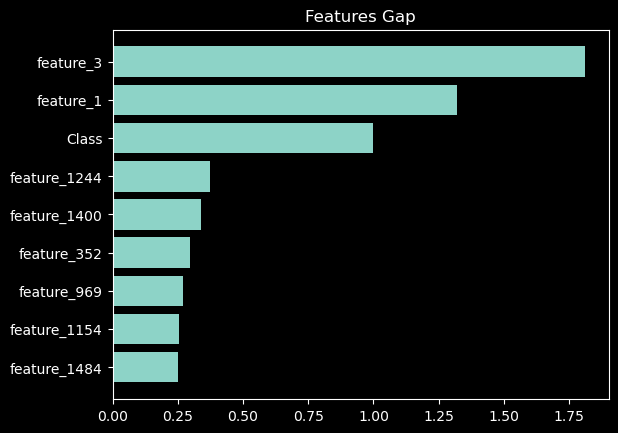

In [16]:
# 가시화
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

# df_top10 = df_concat.sort_values(by=['gap'], ascending=False).head(10)
df_top10 = df_concat.sort_values(by=['gap'], ascending=False).head(10).iloc[1:,:]

df_top10 = df_top10.sort_values(by=['gap'], ascending=True);
plt.title('Features Gap');
plt.barh(df_top10.index, df_top10['gap']);

# Feature Selection

- feature selection : d개의 변수들 중 가장 유효한 p개의 변수를 선택함
- feature extracion : d개의 변수들을 조합해서 새로운 변수 p개를 정의함

In [17]:
# 표준화
from sklearn.preprocessing import StandardScaler

X = df.drop(['Class'], axis=1)
Y = df['Class']

# 정규화
X_ = StandardScaler().fit_transform(X)

In [18]:
df_s = pd.concat([pd.DataFrame(X_, columns=X.columns), pd.DataFrame(Y, columns=['Class'])], axis=1)
df_s.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.840212,0.257373,-0.399500,-1.620979,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337,0.0
1,-0.592807,-0.335743,0.159030,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,8.895862,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,8.018497,-0.122345,-0.098674,-0.0337,0.0
2,0.822300,0.180345,-0.418095,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,8.697826,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.0

In [19]:
# 표준화 후 재비교
df_s_normal = df_s[df_s['Class'] == 0]
df_s_abnormal = df_s[df_s['Class'] == 1]

df_s_normal_mean = pd.DataFrame(df_s_normal.describe()).loc['mean']
df_s_abnormal_mean = pd.DataFrame(df_s_abnormal.describe()).loc['mean']

In [20]:
df_concat = pd.concat([df_s_normal_mean, df_s_abnormal_mean], axis=1, keys=['normal', 'abnormal'])
df_concat['gap'] = abs(df_concat['normal'] - df_concat['abnormal'])
df_concat.head()

,normal,abnormal,gap
feature_1,-0.001919,0.021738,0.023657
feature_2,-0.098259,1.113139,1.211398
feature_3,-0.032173,0.364475,0.396648
feature_4,-0.006106,0.069176,0.075282
feature_5,0.004708,-0.053330,0.058038


In [21]:
# 평균에 대한 차이를 기준으로 내림차순 정렬
# 표준화 전과 표준화 후의 차이가 다름
df_top10 = df_concat.sort_values(by=['gap'], ascending=False).head(10)
df_top10

,normal,abnormal,gap
feature_1400,-0.126258,1.430335,1.556593
feature_1244,-0.118146,1.338440,1.456586
feature_1154,-0.109412,1.239495,1.348908
feature_1048,-0.108304,1.226937,1.335241
feature_1144,-0.108278,1.226650,1.334928
feature_1345,-0.106160,1.202657,1.308817
feature_1425,-0.106011,1.200961,1.306972
feature_1219,-0.106011,1.200961,1.306972
feature_1199,-0.106011,1.200961,1.306972
feature_1423,-0.106011,1.200961,1.306972


In [22]:
# 연속형 변수 구간화 (범주화)
df_s_des = pd.DataFrame(df_s.describe())
df_s_des

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,...,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000
mean,-4.820622e-17,5.900618e-17,2.590101e-16,5.148714e-16,-5.572998e-16,2.679051e-16,8.534721e-16,1.629518e-16,-8.081076e-17,-8.841481e-17,-2.244219e-17,4.213715e-16,3.976935e-16,-1.131004e-16,4.213715e-16,-8.081076e-17,5.935254e-18,-1.811276e-16,2.732578e-16,4.620681e-17,1.448155e-16,3.901367e-16,-1.620466e-16,6.569712e-17,-2.221076e-16,1.262430e-15,4.774022e-16,-4.287709e-17,-7.886645e-17,-1.571347e-16,-2.271455e-16,-1.372508e-16,-2.516894e-16,-9.963984e-17,2.807359e-16,-1.378648e-16,-1.445242e-16,-4.597066e-18,-1.131004e-16,1.553714e-16,-2.029636e-16,2.930945e-16,-1.254747e-16,-8.861948e-17,1.208540e-16,-4.439633e-16,1.208540e-16,-4.123663e-16,-2.741867e-16,-7.249826e-17,...,-1.988389e-17,2.472970e-16,1.448863e-16,4.376659e-17,-4.285348e-17,-1.207360e-16,3.591379e-16,-1.170835e-16,5.621960e-17,4.065570e-16,5.754992e-16,-3.385299e-16,-6.864113e-18,3.576896e-17,-3.624755e-16,-1.067259e-15,9.534032e-16,-9.431700e-16,-2.695266e-17,-2.739427e-16,-1.631959e-16,-1.318350e-16,-5.877003e-17,-1.592285e-16,2.516894e-16,-9.949028e-17,2.813184e-16,2.460533e-16,-1.614326e-16,2.830817e-16,1.328111e-16,9.242150e-17,5.332282e-17,4.078007e-16,6.719982e-16,-1.288123e-16,1.538836e-16,3.538639e-16,1.466496e-16,-2.651185e-17,-2.311758e-16,-1.620466e-16,-1.824658e-17,-2.699674e-16,7.303038e-16,3.323427e-17,5.332282e-17,-5.610153e-16,-2.235638e-16,0.081112
std,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+

In [23]:
# bin 구간을 만들고 np.digitize 를 통해 level 부여
import numpy as np

for i, col in enumerate(df_s.columns[:-1]):
    bins = [df_s_des.loc['min'][i], df_s_des.loc['25%'][i], df_s_des.loc['75%'][i], np.inf]
    feature_name = col + '_gp'
    df_s[feature_name] = np.digitize(df_s[col], bins)

In [24]:
df_s['Class'].value_counts(normalize=True)

0.0    0.918888
1.0    0.081112
Name: Class, dtype: float64

In [25]:
# 기존 변수
df_s.columns[0:1559]

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_1550', 'feature_1551', 'feature_1552', 'feature_1553',
       'feature_1554', 'feature_1555', 'feature_1556', 'feature_1557',
       'feature_1558', 'Class'],
      dtype='object', length=1559)

In [26]:
# 추가된 그룹핑 변수
df_s.columns[1559:]

Index(['feature_1_gp', 'feature_2_gp', 'feature_3_gp', 'feature_4_gp',
       'feature_5_gp', 'feature_6_gp', 'feature_7_gp', 'feature_8_gp',
       'feature_9_gp', 'feature_10_gp',
       ...
       'feature_1549_gp', 'feature_1550_gp', 'feature_1551_gp',
       'feature_1552_gp', 'feature_1553_gp', 'feature_1554_gp',
       'feature_1555_gp', 'feature_1556_gp', 'feature_1557_gp',
       'feature_1558_gp'],
      dtype='object', length=1558)

In [27]:
# Lift 계산을 위해 for문

list_of_df = []
target_ratio = 8.11

for i in df_s.columns[0:1558]:
    gp = i + '_gp'
    temp = df_s.groupby(gp)['Class'].agg(['count', 'sum'])
    temp['ratio'] = round((temp['sum'] / temp['count'])*100, 2)
    temp['lift'] = round(temp['ratio'] / target_ratio, 2)
    temp_df = pd.DataFrame(temp)
    gap = temp_df['lift'].max() - temp_df['lift'].min()
    loop_df = pd.DataFrame([[i, gap]], columns=['val','gap'])
    list_of_df.append(loop_df)
    
df_accum_start = pd.concat(list_of_df)

In [28]:
len(df_accum_start)

1558

In [29]:
# lift max-min Gap이 큰 데이터부터 Sorting
df_accum_start.sort_values(by=['gap'], ascending=False).head(10)

,val,gap
0,feature_2,1.98
0,feature_3,1.61
0,feature_1,0.95
0,feature_4,0.15
0,feature_188,0.11
0,feature_1026,0.00
0,feature_1037,0.00
0,feature_1046,0.00
0,feature_1045,0.00
0,feature_1044,0.00


In [30]:
# 확인
gp = 'feature_1044_gp'

temp = df_s.groupby(gp)['Class'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum']/temp['count'])*100, 2)
temp['lift'] = round(temp['ratio']/8.11, 2)
temp

,count,sum,ratio,lift
feature_1044_gp,,,,
3,1763,143.0,8.11,1.0


In [31]:
# 고정값이여서 하나의 그룹핑만 수행됨
df_s['feature_1044'].value_counts()

-0.184439    1705
 5.421859      58
Name: feature_1044, dtype: int64

In [32]:
df_s_des.loc[:, 'feature_1044']

count    1.763000e+03
mean     7.838943e-16
std      1.000284e+00
min     -1.844386e-01
25%     -1.844386e-01
50%     -1.844386e-01
75%     -1.844386e-01
max      5.421859e+00
Name: feature_1044, dtype: float64

# 이상 탐지 모델링

### Model Selection

- PCA + Mahalanobis Distance Anomaly Detection

In [33]:
# 중심점까지의 거리를 기준으로 이상치를 식별
# 기존 유클리드 거리에 공분산 계산이 더해진 개념
# Mahalanobis Distance 를 사용하여 점과 분포 사이의 거리를 찾음
# 변수의 공분산 행렬을 사용하여 데이터 점과 중심 사이의 거리를 찾음
# 다변량 데이터에서 매우 효과적
# 대표적인 Centroid 방법론인 유클리드 거리와 달리 데이터의 분포 패턴을 기반으로 이상치를 감지

In [34]:
# [good] 데이터의 분포를 고려한 이상치 탐지
# [good] 비선형 관계의 데이터에 활용 가능
# [good] 데이터에 자체에 대한 가정이 필요 없음
# [bad] 변수간의 관계가 모두 독립이라면 유클리드 거리와 같은 개념
# [bad] 변수간의 상관성이 명확히 알려져 있지 않는 경우 적용이 어려움

### 차원 축소 및 변수 설명력 확인

In [35]:
# Data 재할당
df_raw = df_s.iloc[:, 0: 1559]
df_raw.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.840212,0.257373,-0.399500,-1.620979,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337,0.0
1,-0.592807,-0.335743,0.159030,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,8.895862,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,8.018497,-0.122345,-0.098674,-0.0337,0.0
2,0.822300,0.180345,-0.418095,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,8.697826,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.0

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df_raw.drop(['Class'], axis=1)
Y = df_raw['Class']

# PCA 인스턴스
pca = PCA()

pca.fit(X)
reduced = pca.transform(X)

In [37]:
# pca.n_components_ (차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df = pd.DataFrame(data=features, columns=['pc_feature'])

# pca.explained_variance_ratio_ (설명력)
variance_df = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['variance'])
pc_feature_df = pd.concat([feature_df, variance_df], axis=1)
pc_feature_df

# PC0, PC1으로도 전체 분산의 0.03 (3%)까지 밖에 설명하지 못함

,pc_feature,variance
0,0,2.188486e-02
1,1,1.962761e-02
2,2,1.707171e-02
3,3,1.536523e-02
4,4,1.509664e-02
...,...,...
1553,1553,1.486294e-36
1554,1554,1.097665e-36
1555,1555,7.161362e-37
1556,1556,2.914989e-37


<AxesSubplot:xlabel='number of principle components', ylabel='explained features (%)'>

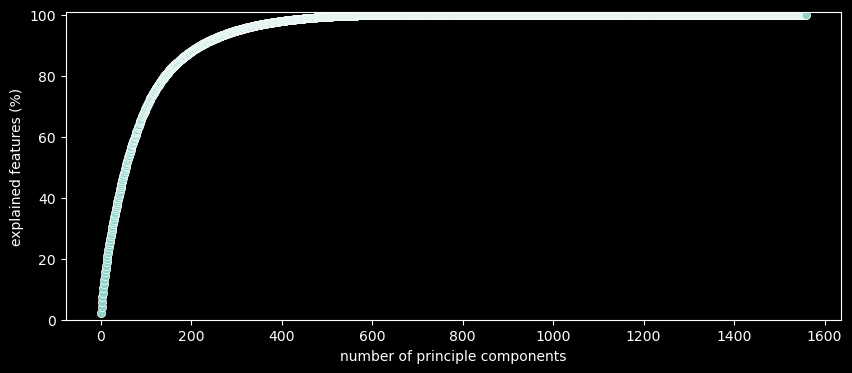

In [38]:
# 200개의 PC를 사용했을 때, 80% 정도 분산을 설명할 수 있음
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

fig, ax = plt.subplots(figsize = (10, 4))
xi = np.arange(1, reduced.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)*100

plt.ylim(0.0, 101)
plt.xlabel('number of principle components')
plt.ylabel('explained features (%)')
sns.scatterplot(xi, y)

### 차원축소 Data set 생성

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# 200개 주성분 수행
pca = PCA(n_components=400)
pc = pca.fit_transform(X)

pc_df = pd.DataFrame(pc).reset_index(drop=True)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,-0.558073,-0.716460,-0.318646,-0.205151,-0.167924,-0.037631,0.136687,0.458809,-1.638302,0.503558,-0.339339,-0.313438,-0.373621,-0.222010,-0.183230,0.238382,-1.008948,-0.499655,-0.257897,0.084674,-0.405169,-0.416438,0.048338,0.049027,0.446290,-0.458582,0.034096,-0.178388,0.087988,0.097382,-0.034083,0.156061,-0.556665,0.143569,-0.209789,0.009818,-0.472960,-0.032815,-0.155382,-0.202298,-0.043739,0.493903,-0.319840,0.030700,0.284658,0.134525,-0.631336,-0.651759,-0.099502,0.009949,...,-0.054445,0.084956,-0.598005,0.060219,0.008795,-0.060834,0.618936,-0.551961,-0.355112,0.149315,0.463674,0.164444,-1.319009,-0.317815,0.645132,0.611378,-0.499856,-0.133927,-0.123706,0.154211,-0.466608,-0.140875,0.011741,-0.487865,0.435973,0.560474,-0.368896,0.621365,0.895728,-0.946439,-0.597171,1.409369,0.820906,0.231868,-0.156281,-0.171946,0.057771,-0.287247,0.312305,0.579783,0.015213,0.660066,0.112843,-0.459594,0.412856,-0.943802,-0.628157,-0.447168,-0.684407,0.114065
1,0.839736,2.780655,45.142385,-3.666786,-0.072672,0.504779,-0.124755,-0.944295,1.803643,0.223604,0.283281,0.022416,0.196559,-0.103382,0.080243,-0.094762,0.429636,0.283695,0.017117,0.065978,0.052612,0.106159,-0.074138,0.014394,0.381447,0.004466,-0.103393,-0.305270,0.823593,-0.309001,0.426315,0.173489,0.275580,0.028116,-1.058713,3.503066,-3.636442,42.972966,12.041876,-6.543542,-0.530800,1.432913,1.155581,1.101465,2.441682,0.166109,1.005005,1.449721,-0.980703,0.098811,...,-1.746043,0.374028,-0.014826,-0.312584,-0.634411,-1.605527,0.689692,1.840679,-0.378782,-1.943313,-0.153071,0.913010,-0.504170,-0.884958,2.251712,-0.644369,1.429549,0.095300,0.718987,0.360246,1.223535,-0.172429,1.354846,0.150141,-2.024640,-0.027474,-0.261557,-0.130267,-0.097322,-1.997175,0.531426,0.442724,0.368384,-2.330577,-1.025061,-0.885674,-1.991032,-0.647831,-0.079299,0.171587,-0.061307,-0.329054,-0.744833,0.111901,0.027602,0.031642,-0.032495,0.890014,-0.069848,0.134095
2,-0.582238,-0.819797,-0.368414,-0.195936,0.379765,-0.029070,0.191940,0.620065,-1.991022,0.629783,-0.464658,-0.206467,-0.225963,-0.230226,5.313308,-0.643148,0.973630,0.015212,0.013370,-0.140216,-0.163417,0.133859,-0.029279,0.074066,0.088955,-0.013143,0.095572,-0.148791,0.015284,0.062556,0.004596,0.201348,-0.481743,0.251992,-0.241935,-0.059923,-0.201972,-0.008355,-0.155226,-0.095932,0.011816,0.107699,-0.242460,0.036673,-0.106045,0.013388,-0.036591,-0.344931,0.313654,0.046232,...,0.236015,-0.028869,0.071136,0.105321,0.191456,0.039497,-0.049499,-0.009497,0.097117,0.088648,-0.078709,-0.051226,-0.022341,0.108475,-0.140555,0.168038,0.127002,-0.124781,0.085765,0.124349,-0.182114,0.143668,-0.182563,-0.108057,0.050082,-0.094914,-0.112272,0.005068,0.066161,-0.040184,-0.010596,0.018106,-0.003911,0.182445,0.181954,0.151958,-0.150598,0.092935,-0.028085,0.317947,0.317485,-0.051085,-0.219147,-0.183613,0.000506,0.234584,-0.477761,0.473698,-0.018508,0.208741
3,-0.593084,-0.653150,-0.184986,-0.225468,-0.194809,-0.040701,0.106365,0.357339,-1.239176,0.480431,-0.230315,-0.418809,0.763574,0.085282,0.026716,0.261058,-0.920688,0.290526,-0.079552,-0.216978,-0.413125,0.369143,-0.184962,0.085153,0.011535,-0.060550,0.094562,-0.196672,-0.044675,-0.035375,0.088483,0.198087,-0.544191,0.382438,-0.343733,-0.128640,-0.197241,0.091510,-0.118384,-0.231364,0.081301,0.139159,-0.270053,0.094862,-0.185284,0.120470,-0.056913,-0.566417,0.465506,-0.183638,...,-0.502860,0.229019,-0.326089,0.023480,0.738154,-0.298873,-0.252594,-0.084546,0.355123,0.453832,0.330991,-0.256999,-0.056245,0.033912,-0.223479,-0.396189,0.270934,0.495901,0.110003,-0.056521,0.053164,-0.103206,0.451487,0.377961,0.069022,0.309807,-0.239818,0.054473,0.063011,0.199041,0.167428,-0.070101

### MD 모델 생성 및 학습

In [40]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope

outlier_detector = EllipticEnvelope(contamination=.10)

outlier_detector.fit(pc_df)

pred = outlier_detector.predict(pc_df)
pred

array([ 1, -1,  1, ...,  1,  1,  1])

In [41]:
# 몇개를 inlier(1)로 예측하고 몇개를 outlier(-1)로 판단했는지
pd.Series(pred).value_counts()

 1    1586
-1     177
dtype: int64

In [42]:
# 평가를 위해 다시 라벨링
y_pred = np.where(pred == -1, 1, 0)

In [43]:
# 성능평가
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1620
         1.0       0.19      0.23      0.21       143

    accuracy                           0.86      1763
   macro avg       0.56      0.57      0.56      1763
weighted avg       0.87      0.86      0.86      1763



In [44]:
answer = pd.DataFrame({'pred':y_pred, 'Class':Y}, columns=['pred','Class'])

### Scoring 기반 Threshold 조정을 통한 머신러닝 정확도 향상 모색

In [45]:
# distance 추출
outlier_detector.dist_

array([2.66657156e+02, 3.35842400e+07, 1.31714819e+02, ...,
       2.88945189e+05, 3.22872031e+02, 4.59321892e+02])

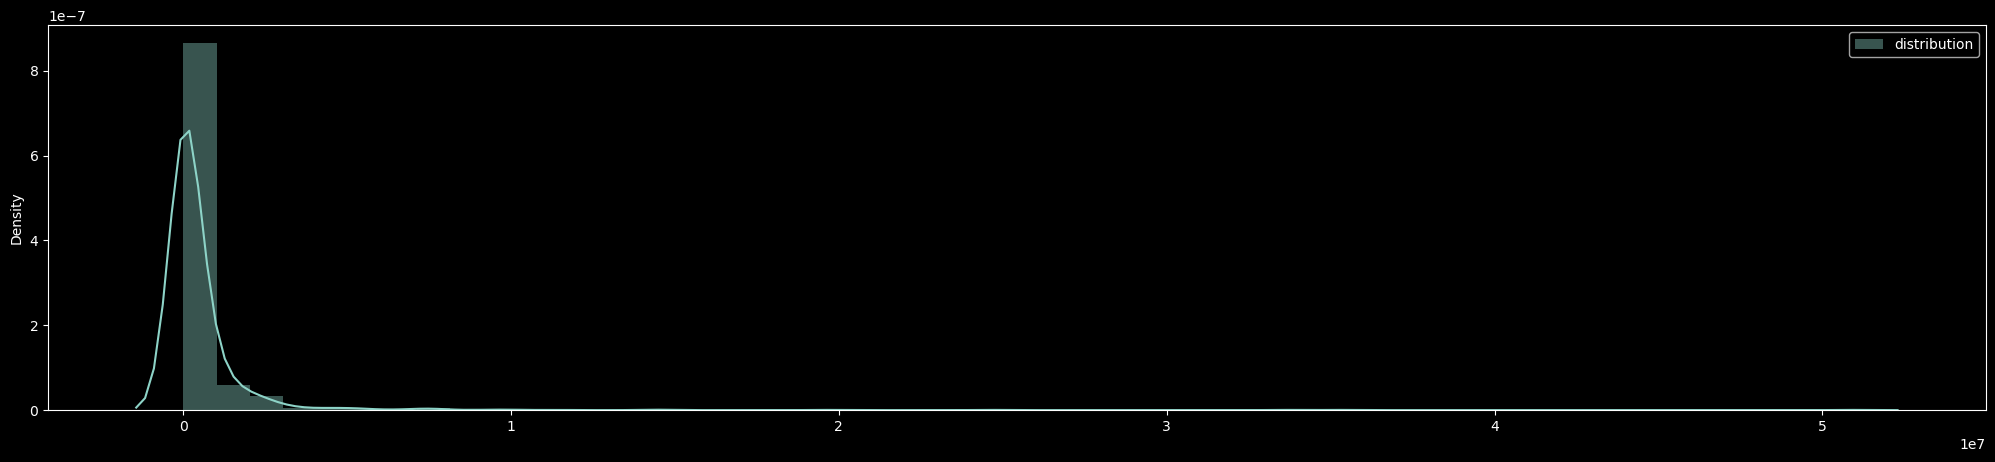

In [46]:
# 분포 시각화를 통해 Threshold 조정
fig, ax = plt.subplots(figsize= (25,5))
sns.distplot(outlier_detector.dist_, label='distribution');
plt.legend();

In [47]:
0.1*pow(10, 7)

1000000.0

In [60]:
# Score 변수 할당
y_pred_re = np.where(outlier_detector.dist_ > 0.10 * pow(10,7), 1, 0)

In [61]:
# 성능 평가
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred_re))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      1620
         1.0       0.20      0.31      0.25       143

    accuracy                           0.85      1763
   macro avg       0.57      0.60      0.58      1763
weighted avg       0.88      0.85      0.86      1763



In [62]:
pd.Series(y_pred_re).value_counts()

0    1547
1     216
dtype: int64